In [1]:
#imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series, DataFrame

plt.style.use('seaborn-v0_8')

In [ ]:
'''
    domain knowledge before diving into analysis
    - longitudinal position: In context of yacht(boats), it means the total distance from front(bow) to back(rear)
    - prismatic coefficient: It is used to describe the shape of ships hull.
    - length displacement ratio: It is used to assess the slenderness of a boat's hull
    - beam - draught ratio: It is used to describe the relationship between the beam width and draught of a ship hull
    - length-beam ratio: It is used to describe the proportions of a vessel to its maximum beam
    - Froude number: It is used to characterize the flow regime of a fluid, particularly in context of open flow
    - Residual resistance per unit weight of displacement.
'''

In [ ]:
'''
    - longitudinal position of the center of buoyancy
    - 
'''

In [9]:
#we are reading .data file so we have to give columns names because .data file will not contain columns names
features = ['longitudinal_position', 'prismatic_coefficient', 'legth_displacement_ratio', 'beam_draught_ration', 'length_beam_ratio', 'froude_number', 'residual_resistant']

In [7]:
data = pd.read_fwf('/Users/anilthapa/Documents/Datasets/yacht_hydrodynamics.data', names = features)
data

,longitudinal_position,prismatic_coefficient,legth_displacement_ratio,beam_draught_ration,length_beam_ratio,froude_number,residual_resistant
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [12]:
data.shape

(308, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitudinal_position     308 non-null    float64
 1   prismatic_coefficient     308 non-null    float64
 2   legth_displacement_ratio  308 non-null    float64
 3   beam_draught_ration       308 non-null    float64
 4   length_beam_ratio         308 non-null    float64
 5   froude_number             308 non-null    float64
 6   residual_resistant        308 non-null    float64
dtypes: float64(7)
memory usage: 17.0 KB


In [14]:
data.describe()

,longitudinal_position,prismatic_coefficient,legth_displacement_ratio,beam_draught_ration,length_beam_ratio,froude_number,residual_resistant
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,-2.381818,0.564136,4.788636,3.936818,3.206818,0.287500,10.495357
std,1.513219,0.023290,0.253057,0.548193,0.247998,0.100942,15.160490
min,-5.000000,0.530000,4.340000,2.810000,2.730000,0.125000,0.010000
25%,-2.400000,0.546000,4.770000,3.750000,3.150000,0.200000,0.777500
50%,-2.300000,0.565000,4.780000,3.955000,3.150000,0.287500,3.065000
75%,-2.300000,0.574000,5.100000,4.170000,3.510000,0.375000,12.815000
max,0.000000,0.600000,5.140000,5.350000,3.640000,0.450000,62.420000


In [15]:
features = ['longitudinal_position', 'prismatic_coefficient',
       'legth_displacement_ratio', 'beam_draught_ration', 'length_beam_ratio',
       'froude_number', 'residual_resistant']

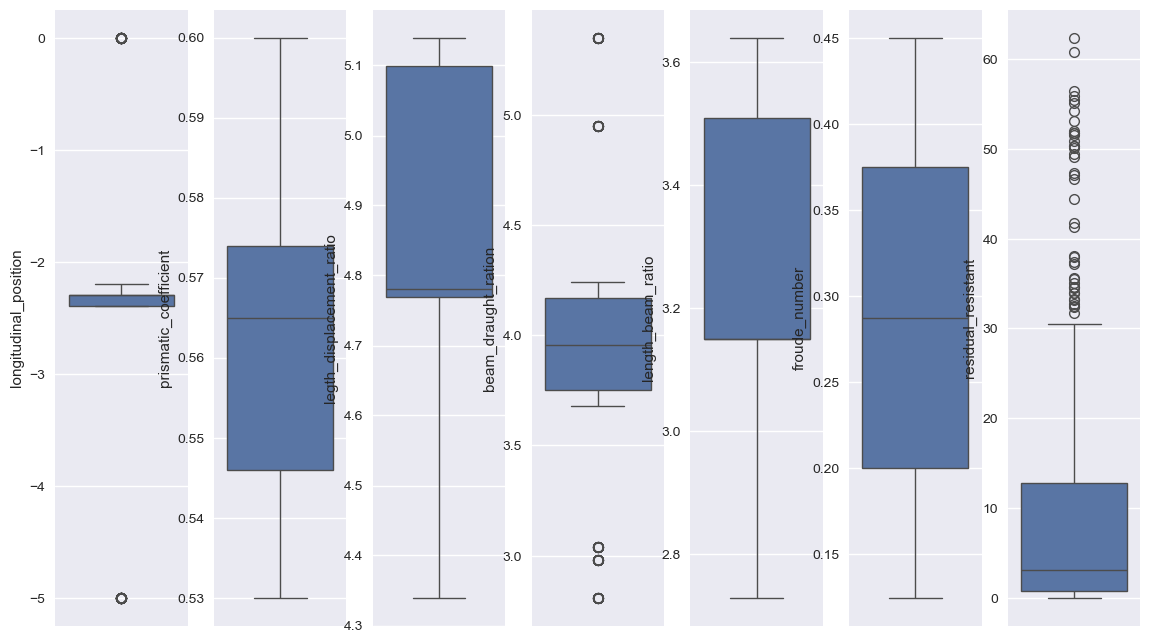

In [24]:
#creating a box plot for outlier detection
fig1, ax1 = plt.subplots(nrows=1, ncols=7, figsize =(14,8))
for i, feature in enumerate(features):
    sns.boxplot(data[feature], vert = True, ax = ax1[i])
plt.show()

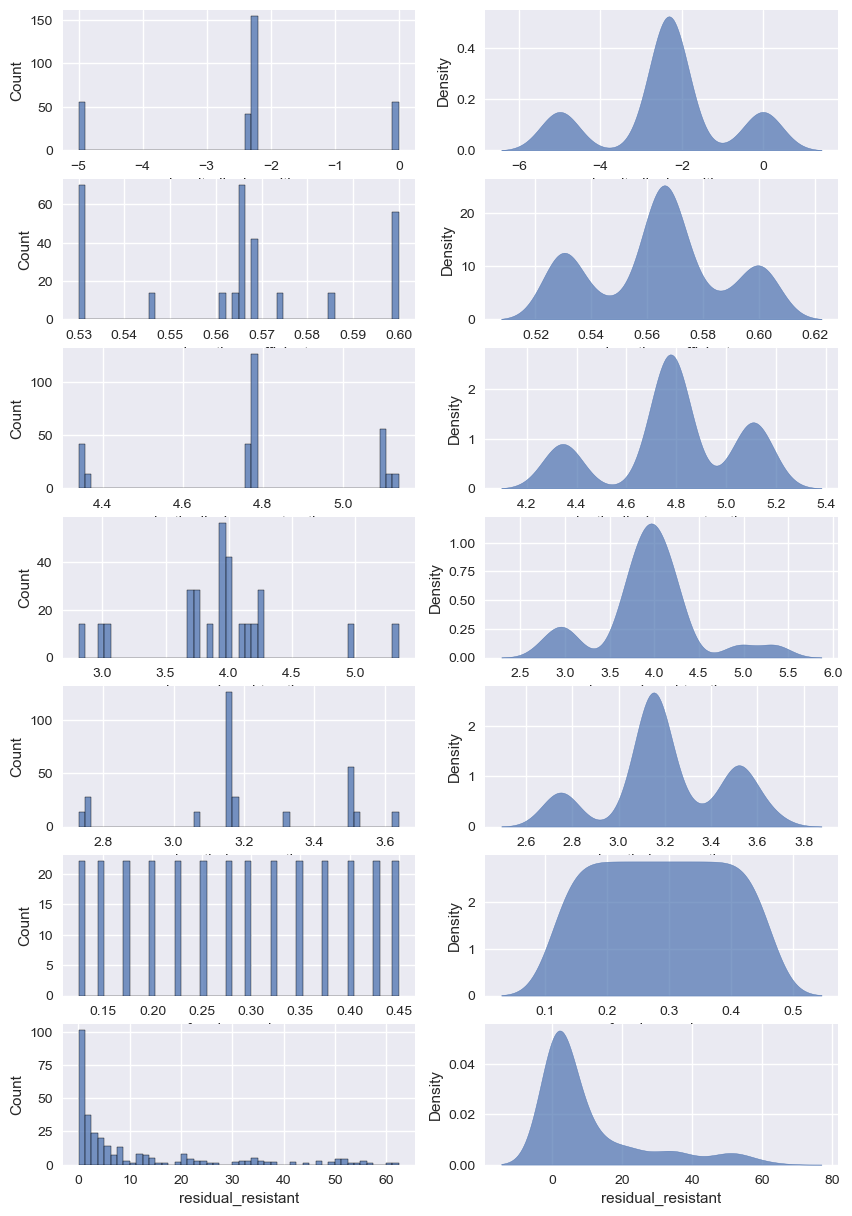

In [32]:
#creating the histplot and KDE plot
fig2, ax2= plt.subplots(nrows=7, ncols=2, figsize = (10,15))
for  i,feature in enumerate(features):
    sns.histplot(data[feature], bins = 50, ax = ax2[i, 0])
    sns.kdeplot(data[feature], fill=True, alpha = 0.7, ax = ax2[i, 1])
    
    
plt.show()

<Axes: >

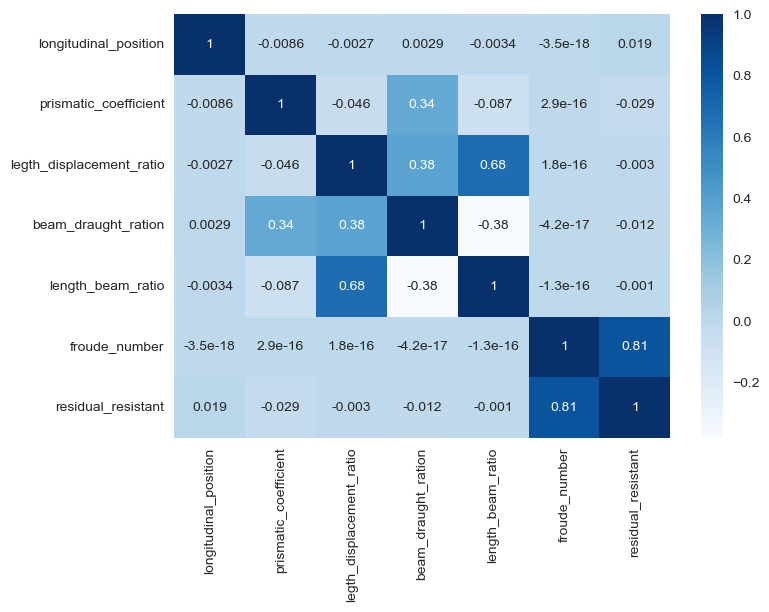

In [34]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [11]:
X = data[['longitudinal_position', 'prismatic_coefficient',
       'legth_displacement_ratio', 'beam_draught_ration', 'length_beam_ratio',
       'froude_number']].copy()
y = data['residual_resistant']